In [61]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.
In this notebook, you will load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [62]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [63]:
#Drop not required columns
cad_jpy_df = cad_jpy_df.drop(columns=['Open','High','Low'])
cad_jpy_df.head()

,Price
Date,
1982-01-05,184.65
1982-01-06,185.06
1982-01-07,186.88
1982-01-08,186.58
1982-01-11,187.64


In [64]:
# Trim the dataset to begin on January 1st, 1990
#cad_jpy_df_trim = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df_trim = cad_jpy_df.loc["1990-01-01":]
cad_jpy_df_trim.head()

,Price
Date,
1990-01-02,126.37
1990-01-03,125.30
1990-01-04,123.46
1990-01-05,124.54
1990-01-08,124.27


# Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

<AxesSubplot:xlabel='Date'>

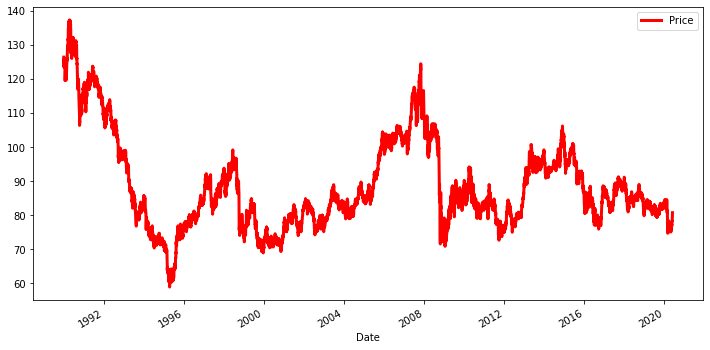

In [65]:
# Plot just the "Price" column from the dataframe:
# YOUR CODE HERE!
#cad_jpy_df_trim.Price.plot(xlabel='Date',ylabel='Price',legend='Original Price',title='CAD-JPY exchange rates',figsize=(15,10))
cad_jpy_df_trim.plot(color='red', linewidth=3, figsize=(12,6))

<AxesSubplot:xlabel='Date'>

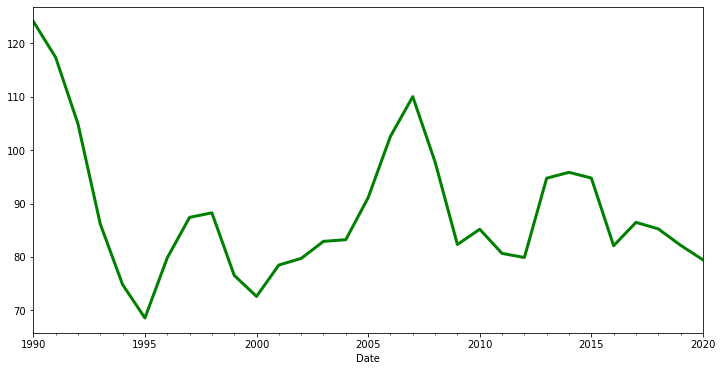

In [66]:
# Resample data annually and calculate mean
cad_jpy_df_trim_sma = cad_jpy_df_trim.Price.resample('A').mean()
cad_jpy_df_trim_sma.plot(color='green', linewidth=3, figsize=(12,6))

**Question:** Do you see any patterns, long-term and/or short? 

**Answer:** YOUR ANSWER HERE

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the exchange rate price into trend and noise.

In [67]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
# YOUR CODE HERE!
ts_noise, ts_trend = sm.tsa.filters.hpfilter(cad_jpy_df_trim['Price'])

In [68]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!
cad_jpy_df_trim['noise']=ts_noise
cad_jpy_df_trim['trend']=ts_trend
cad_jpy_df_trim.head()

,Price,noise,trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


In [69]:
#Trim the data set for year 2015 onwards
cad_jpy_df_2015_present = cad_jpy_df_trim.loc['2015':]
cad_jpy_df_2015_present

,Price,noise,trend
Date,,,
2015-01-01,103.12,1.523927,101.596073
2015-01-02,102.25,0.945717,101.304283
2015-01-05,101.70,0.708200,100.991800
2015-01-06,100.04,-0.620865,100.660865
2015-01-07,100.93,0.615839,100.314161
...,...,...,...
2020-05-29,78.29,-0.503961,78.793961
2020-06-01,79.27,0.218939,79.051061
2020-06-02,80.40,1.088117,79.311883


<AxesSubplot:title={'center':'Price vs. the Trend for 2015 to the present'}, xlabel='Date'>

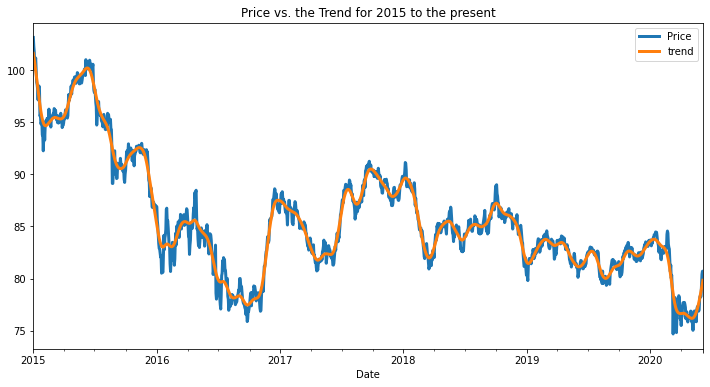

In [70]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!
cad_jpy_df_2015_present.plot(y=['Price','trend'],title='Price vs. the Trend for 2015 to the present',linewidth=3, figsize=(12,6))

**Question:** Do you see any patterns, long-term and/or short?

**Answer:** YOUR ANSWER HERE

In [71]:
# Plot the Settle Noise
# YOUR CODE HERE!

<AxesSubplot:title={'center':'Noise Plot'}, xlabel='Date'>

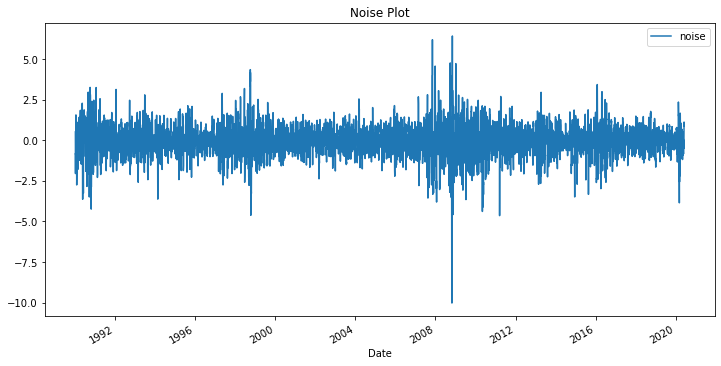

In [72]:
cad_jpy_df_trim.plot(y=['noise'],title='Noise Plot',figsize=(12,6))

---

# Forecasting Returns using an ARMA Model

Using exchange rate *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [73]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns

,Price
Date,
1982-01-06,0.222042
1982-01-07,0.983465
1982-01-08,-0.160531
1982-01-11,0.568121
1982-01-12,-0.234492
...,...
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508


<AxesSubplot:xlabel='Date'>

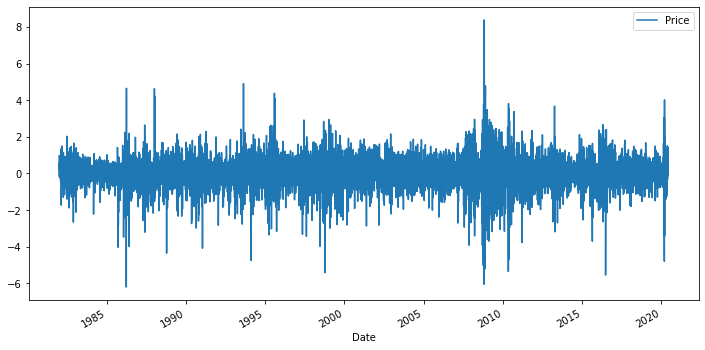

In [74]:
returns.plot(figsize=(12,6))

In [75]:
from statsmodels.tsa.arima_model import ARMA

In [76]:
import statsmodels.api as sm

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!
model = ARMA(returns.values, order=(2,1))

# Fit the model and assign it to a variable called results
# YOUR CODE HERE!
results = model.fit()

In [78]:
# Output model summary results:
# YOUR CODE HERE!
results.summary()

<AxesSubplot:title={'center':'Exchange Rate Return Forecast'}>

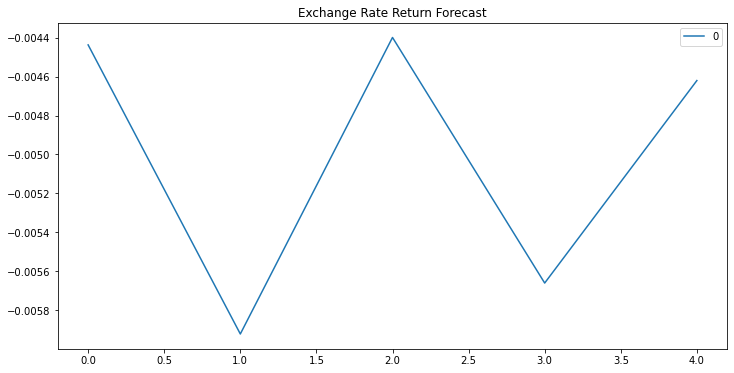

In [80]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Exchange Rate Return Forecast",figsize=(12,6))

**Question:** Based on the p-value, is the model a good fit?

**Answer:** YOUR ANSWER HERE

---

# Forecasting the Exchange Rate Price using an ARIMA Model

 1. Using the *raw* CAD/JPY exchange rate price, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Plot a 5 day forecast for the Exchange Rate Price. What does the model forecast predict will happen to the Japanese Yen in the near term?

In [81]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!
model = ARIMA(cad_jpy_df["Price"], order=(5, 1, 1))


# Fit the model
# YOUR CODE HERE!
results = model.fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 9965
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -11737.114
Method:                       css-mle   S.D. of innovations              0.786
Date:                Fri, 29 Apr 2022   AIC                          23490.229
Time:                        21:33:03   BIC                          23547.884
Sample:                             1   HQIC                         23509.748
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0104      0.008     -1.281      0.200      -0.026       0.006
ar.L1.D.Price    -0.4652      0.374     -1.245      0.213      -1.198       0.267
ar.L2.D.Price     0.0080      0.011      0.696      0.486      -0.015       0.030
ar.L3.D.Price     0.0137      0.012      1.151      0.250      -0.010       0.037
ar.L4.D.Price     0.0187      0.011      1.629      0.103      -0.004       0.041
ar.L5.D.Price     0.0143      0.011      1.325      0.185      -0.007       0.035
ma.L1.D.Price     0.4568      0.374      1.223      0.221      -0.275       1.189
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9826           -0.6603j            2.0897           -0.4488
AR.2           -1.9826           +0.6603j            2.0897            0.4488
AR.3            2.4379           -0.0000j            2.4379           -0.0000
AR.4            0.1076           -2.5650j            2.5672           -0.2433
AR.5            0.1076           +2.5650j            2.5672            0.2433
MA.1           -2.1891           +0.0000j            2.1891            0.5000
-----------------------------------------------------------------------------
"""

In [98]:
# Output model summary results:
# YOUR CODE HERE!
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 9965
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -11737.114
Method:                       css-mle   S.D. of innovations              0.786
Date:                Fri, 29 Apr 2022   AIC                          23490.229
Time:                        21:35:37   BIC                          23547.884
Sample:                             1   HQIC                         23509.748
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0104      0.008     -1.281      0.200      -0.026       0.006
ar.L1.D.Price    -0.4652      0.374     -1.245      0.213      -1.198       0.267
ar.L2.D.Price     0.0080      0.011      0.696      0.486      -0.015       0.030
ar.L3.D.Price     0.0137      0.012      1.151      0.250      -0.010       0.037
ar.L4.D.Price     0.0187      0.011      1.629      0.103      -0.004       0.041
ar.L5.D.Price     0.0143      0.011      1.325      0.185      -0.007       0.035
ma.L1.D.Price     0.4568      0.374      1.223      0.221      -0.275       1.189
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9826           -0.6603j            2.0897           -0.4488
AR.2           -1.9826           +0.6603j            2.0897            0.4488
AR.3            2.4379           -0.0000j            2.4379           -0.0000
AR.4            0.1076           -2.5650j            2.5672           -0.2433
AR.5            0.1076           +2.5650j            2.5672            0.2433
MA.1           -2.1891           +0.0000j            2.1891            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day Futures Price Forecast'}>

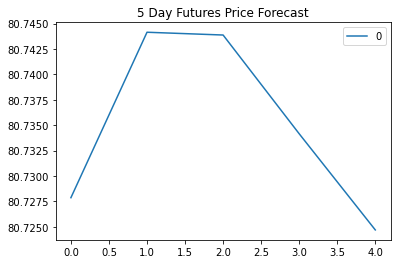

In [100]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="5 Day Futures Price Forecast")

**Question:** What does the model forecast will happen to the Japanese Yen in the near term?

**Answer:** YOUR ANSWER HERE

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen exchange rate returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using exchange rate *Returns*, estimate a GARCH model. **Hint:** You can reuse the `returns` variable from the ARMA model section.

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [101]:
import arch as arch

In [102]:
# Estimate a GARCH model:
# YOUR CODE HERE!
from arch import arch_model
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

# Fit the model
# YOUR CODE HERE!
res = model.fit(disp="off")

In [ ]:
# Summarize the model results
# YOUR CODE HERE!
res.summary()

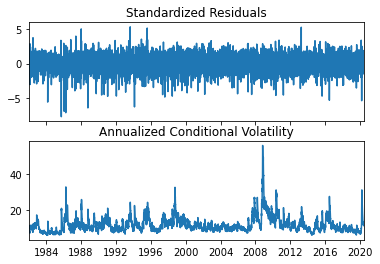

In [106]:
fig = res.plot(annualize='D')

**Note:** Our p-values for GARCH and volatility forecasts tend to be much lower than our ARMA/ARIMA return and price forecasts. In particular, here we have all p-values of less than 0.05, except for alpha(2), indicating overall a much better model performance. In practice, in financial markets, it's easier to forecast volatility than it is to forecast returns or prices. (After all, if we could very easily predict returns, we'd all be rich!)

In [92]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [93]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
# YOUR CODE HERE!
forecasts = res.forecast(start=last_day, horizon=forecast_horizon)
forecasts

In [94]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.443383,12.451102,12.458704,12.466192,12.473567


In [95]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.443383
h.2,12.451102
h.3,12.458704
h.4,12.466192
h.5,12.473567


<AxesSubplot:>

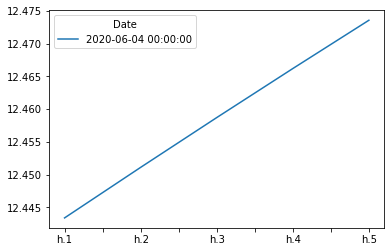

In [107]:
# Plot the final forecast
# YOUR CODE HERE!
final.plot()

**Question:** What does the model forecast will happen to volatility in the near term?

**Answer:** YOUR ANSWER HERE

---

# Conclusions

1. Based on your time series analysis, would you buy the yen now?

    * YOUR ANSWER HERE

2. Is the risk of the yen expected to increase or decrease?
    * YOUR ANSWER HERE

3. Based on the model evaluation, would you feel confident in using these models for trading?
    * YOUR ANSWER HERE